Plot the connectivity within and outside of the prior for each subtype that shows a relationship with diagnosis

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import nibabel as nib
import nilearn as nil

from scipy import io as sio
from matplotlib import gridspec
from nilearn import plotting as nlp
from matplotlib import pyplot as plt

/home/surchs/Venv/serv3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
%matplotlib inline

In [26]:
# Paths
# Let's start with the full sample, maybe data, mean subtype at scale 7. We look at everything
pri_path = '/data1/cambridge/template/template_cambridge_basc_multiscale_sym_scale007.nii.gz'
map_path = '/data1/guilimin/abide/subtype/sc7/full_maybe/'
norm_map_tmp = 'net_{}_sbt_{}_map_norm.nii.gz'
mask_path = '/data1/guilimin/abide/masks/template_mask.nii.gz'
sbt_effects = ((1,2),(1,5),(2,5),(3,1),(3,2),(6,1),(6,5))
fig_path = '/home/surchs/GDrive/PhD/Conferences/HBM2016/Poster/Figures/'

In [6]:
m_img = nib.load(mask_path)
mask = m_img.get_data().astype(bool)

In [7]:
p_img = nib.load(pri_path)
prior = p_img.get_data()
p_vec = prior[mask]

In [16]:
sbt_effects = ((1,2),(2,5),(3,1),(3,2))
names = ('Subtype 2\nCerebellum',
         'Subtype 5\nLimbic Network',
         'Subtype 1\nSomatomotor Network',
         'Subtype 2\nSomatomotor Network')
var = np.array([])
label = np.array([])
for ids, (network, subtype) in enumerate(sbt_effects):
    norm_path = os.path.join(map_path, norm_map_tmp.format(network, subtype))
    n_img = nib.load(norm_path)
    norm = n_img.get_data()
    n_vec = norm[mask]
    
    within = n_vec[p_vec==network]
    outside = n_vec[p_vec!=network]
    
    var = np.concatenate((var, within))
    label = np.concatenate((label, np.ones_like(within)*ids))
df = pd.DataFrame(data={'within':var, 'subtype':label})
df.subtype.replace({0:names[0], 1:names[1], 2:names[2], 3:names[3]}, inplace=True)

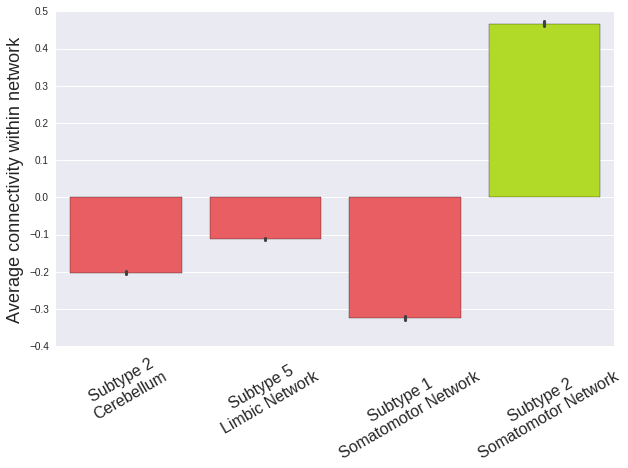

In [31]:
f = plt.figure(figsize=(10,6))
ax = f.add_subplot(111)
tmp = sb.barplot(x="subtype", y="within", data=df, ax=ax,
                palette=sb.xkcd_palette(["light red","light red","light red","chartreuse"]))
tmp = ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_ylabel('Average connectivity within network', fontsize=18)
fig_name = 'within_connectivity.png'
f.savefig(os.path.join(fig_path, fig_name), transparent=False, bbox_inches='tight',
                        pad_inches=0)

In [35]:
np.linspace(0,100,7)

array([   0.        ,   16.66666667,   33.33333333,   50.        ,
         66.66666667,   83.33333333,  100.        ])